<a href="https://colab.research.google.com/github/dyjdlopez/numeth2021/blob/main/Week%203/NuMeth_2_Roots_of_Equations_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Roots of Equations
$_{\text{©D.J. Lopez | 2021 | Computational Methods for Computer Engineers}}$

Many problems in engineering, the sciences, and cognitive computing is founded on root-finding algorithms. In this module, we will discuss how to algorithmically solve for the roots of non-linear equations (i.e. equations of higher-order and transcendental functions). We will discuss several methods in solving the roots of these equations. The coverage of the module is as follows:
* Review of Roots
* Simple Iteration Method (Brute Force)
* Convergence vs. Divergence
* Newton-Rhapson Method
* Bisection Method
* Regula Falsi Method (False Position) 
* Secant Method
* Python Functions for Roots
* Applications of Root-finding

## 2.1 What are roots again?

Several engineering and scientific problems can be formulated in terms of finding the value/s of some parameter or variable $x$ which results in a zero value of some function of that variable (i.e. stability, entropy, equivalency). Mathematically, this is represented by:

$$F(x)=0 
\\ _{\text{(Eq. 2.1.1)}}$$ 
Whereas $F(x)$ is some function of $x$. These functions could be polynomials:

$$F(x)=a_0+a_1x+a_2x^2+a_3x^3+...+a_1x^n 
\\ _{\text{(Eq. 2.1.2)}}$$
Whereas $a_k$ is a numerical coefficient that could be any real number while $x^k$ is the parameter or variable in the polynomial.

$F(x)$ could also be transcendental functions:

$$F(x)=2e^{x+1}+3e^{(x+1)^2} 
\\ _{\text{(Eq. 2.1.3)}}$$
Transcendental functions are functions that are expressible as a finite combination of the algebraic operations of addition, subtraction, multiplication, division, raising to a power, and extracting a root. They could include but are not limited to trigonometric functions, exponential functions, or logarithmic functions.

### Manual Computation

A traditional practice in engineering mathematics or any traditional mathematics class is to solve for the roots using pen and paper or using a standard equation such as the quadratic formula:

$$x = \frac{-b\pm\sqrt{b^2-4ac}}{2a} 
\\ _{\text{(Eq. 2.1.4)}}$$
We can apply Eq. 2.1.4 to a quadratic equation, for example with:
$$F(x)=x^2+x-2$$
We can derive the roots $x_0=-2$ and $x_1=1$. This satisfies the condition of Eg. 2.1.1, whereupon setting the pre-image of the function to the roots $x_0$ and $x_1$ will yield an image of 0.

We can go further in visualizing the roots and its function using Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### First we define f(x) as a user-defined function
def f(x): return x**2+x-2
### Without doing any programmatic solution we'll set
### x_0 and x_1 with the values we solved.
x0, x1 = -2, 1

In [3]:
### Next we need to define the range of values for
### the pre-images.
X = np.arange(-5,5,1,dtype=float)
print(X[0:10])

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]


In [4]:
### Let's now determine the images of our function
### We can do this by setting the input of our user-
### defined function with the set of pre-images we
### defined earlier.
Y = f(X)
print(Y[0:10])

[18. 10.  4.  0. -2. -2.  0.  4. 10. 18.]


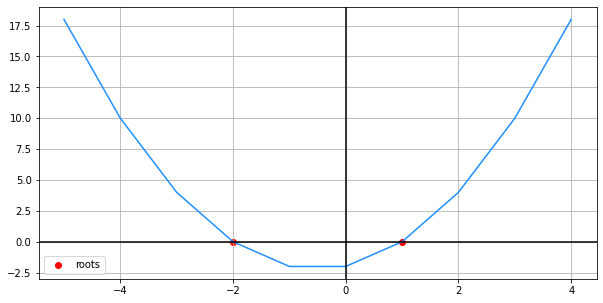

In [5]:
### Now let's plot the images against the pre-images
plt.figure(figsize=(10,5))
plt.plot(X,Y,color='dodgerblue')
### Let's show the x and y axes of the graph
plt.axhline(color='black')
plt.axvline(color='black')
plt.grid()
### Now let's plot the roots of the equation
plt.scatter([x0,x1],[0,0], c='red', label='roots')

plt.legend()
plt.show()

#### **Activity 2.1** 
1. Identify **two more polynomials** preferably **orders higher than 2** and **two transcendental functions**. Write them in **LaTex**.
2. Plot their graphs you may choose your own set of pre-images.
3. Manually solve for their roots and plot them along the graph of the equation.

Use the space the space below for your answers.

*Space for your equations in LaTeX*

In [ ]:
## Space for your code. You can add more cells if you want.

### Computational Methods
In modern mathematics, especially for the practice of Physics, Computer Science, and Computer Engineering, we will harness the power of computers in solving for problems such as root-finding. For the rest of this course, we will use Python in applying numerical methods.

Computational methods or techniques translate the traditional mathematical, statistical, and scientific models or equations to computer programming aiming to increse the efficiency and applicability of these models to actual use. Understanding and practicing these methods will eventually lead to the fields e.g. Computational Physics and Artificial Intelligence. The famous programming languages used by scientists and engineers in practicing computational methods include:
* Python
* MATLab
* R
* Fortran
* F#
* C++ 

## 2.2 Simple Iteration Method (Brute Force)
The first method that we will use in applying computational methods is through iterative methods. These methods are called **iterative** because the algorithms that will be designed will utilize iterations or looping statements.

The easiest way to start with these iterative methods is through the *brute force* method. It's called brute force because we will use a linear search for finding the roots of equations. Brute force are rarely used in deployment of computational models because they are inefficient for higher degree equations.

### 2.2.1 Brute Force Algorithm ($F(x)=0$)
1. Set the function $f(x)$.
2. Set the number of iterations
3. Set a seed value or a starting guess as $h$. Usually zero.
4. Apply the current $h$ to $f(x)$.
5. Check whether the image produced is 0. (Eq. 2.1.1)
6. If $f(h) \not\approx 0$, then repeat again from (4).
7. If $f(h) \approx 0$, then $x_{root}=h$.



In [6]:
def f(x): return x**2+x-2
def g(x): return x**3+3*x**2+-4*x

In [7]:
## Finding one root
epochs = 100
x_root = None
end_iter = 0
h = -10
for epoch in range(epochs):
  y = f(h)
  if np.allclose(f(h),0):
    x_root = h
    end_iter = epoch
    break
  else:
    h+=1
print(f"Identified root is {x_root}, found in {end_iter} epochs.")

Identified root is -2, found in 8 epochs.


In [8]:
## Finding n number of roots
n_roots = 2
epochs = 100
x_roots = []
end_iter = 0
h = -10
for epoch in range(epochs):
  print(f"Current epoch: {epoch}, h={h}, F(x)={f(h)}")
  if np.allclose(f(h),0):    
    x_roots.insert(len(x_roots), h) 
    end_iter = epoch
    if len(x_roots) == n_roots:
      break
  h+=1
  
print(f"Identified roots are {x_roots}, found in {end_iter+1} epochs.")

Current epoch: 0, h=-10, F(x)=88
Current epoch: 1, h=-9, F(x)=70
Current epoch: 2, h=-8, F(x)=54
Current epoch: 3, h=-7, F(x)=40
Current epoch: 4, h=-6, F(x)=28
Current epoch: 5, h=-5, F(x)=18
Current epoch: 6, h=-4, F(x)=10
Current epoch: 7, h=-3, F(x)=4
Current epoch: 8, h=-2, F(x)=0
Current epoch: 9, h=-1, F(x)=-2
Current epoch: 10, h=0, F(x)=-2
Current epoch: 11, h=1, F(x)=0
Identified roots are [-2, 1], found in 12 epochs.


### 2.2.2 Brute Force Algorithm (In terms of X)
1. Rearrange where the a single order of x is on one side of the equation.
2. Set/Assume initial value of root. Usually 0.
3. Calculate the new value of $x$ as $x'$ by substituting the current value of $x$ to the equation in (1).
4. If $x' \approx x$ then $x'$ is a root.
5. If $x' \not\approx x$ then $x'$ is not a root. Repeat from (3).

In [9]:
#def f(x): return x**2+x-2
def f1(x): return 2-x**2
def f2(x): return np.sqrt(2-x)

In [10]:
## Solving for a single root
x = 0
epochs = 100
for epoch in range(epochs):
  x_prime = f1(x)
  print(f"Current epoch: {epoch}, x'={x_prime}")
  if np.allclose(x, x_prime):
    break
  x = x_prime
print(x)

Current epoch: 0, x'=2
Current epoch: 1, x'=-2
Current epoch: 2, x'=-2
-2


In [11]:
## Solving for n number of roots
funcs = [f1, f2]
n_roots = 2
roots = []
epochs = 100
for func in funcs:
  print('----Trying new function to get roots...')
  x = 0
  for epoch in range(epochs):    
    x_prime = func(x)
    print(f"Current epoch: {epoch}, dx={func(x)}")
    if np.allclose(x, x_prime,1e-05):
      roots.insert(len(roots),x_prime)
      break    
    x = x_prime
print(roots)

----Trying new function to get roots...
Current epoch: 0, dx=2
Current epoch: 1, dx=-2
Current epoch: 2, dx=-2
----Trying new function to get roots...
Current epoch: 0, dx=1.4142135623730951
Current epoch: 1, dx=0.7653668647301795
Current epoch: 2, dx=1.1111404660392046
Current epoch: 3, dx=0.9427934736519953
Current epoch: 4, dx=1.0282054883864433
Current epoch: 5, dx=0.9857963844595682
Current epoch: 6, dx=1.007076767451435
Current epoch: 7, dx=0.9964553339455638
Current epoch: 8, dx=1.0017707652224817
Current epoch: 9, dx=0.9991142250901637
Current epoch: 10, dx=1.0004427894236814
Current epoch: 11, dx=0.9997785807749227
Current epoch: 12, dx=1.000110703484908
Current epoch: 13, dx=0.9999446467255535
Current epoch: 14, dx=1.0000276762542357
Current epoch: 15, dx=0.999986161777134
Current epoch: 16, dx=1.000006919087496
Current epoch: 17, dx=0.9999965404502678
Current epoch: 18, dx=1.00000172977337
[-2, 1.00000172977337]


## 2.3 Convergent and Divergent Algorithms
It is important to identify success of your algorithms. One way to see whether a computational method is solving a problem i.e. finding roots or optimizing equations is to determine if the solution you are developing is converging or diverging to the answer.

**Convergence**

When we talk about the convergence of a solution, it pertains to the gradient of similarity between the current solution and the theoretical solution. If this were repsented in a graph, it would look like two similar graphs joining together after several epochs or iterations (Fig. 2.1). 

**Divergence**

Divergence would then pertain to the event in which the answers that you are producing and the theoretical solutions do not meet each other or they split away from each other (Fig. 2.2).

In [12]:
def k(x): return (2*x**3+0.5*x+20)**0.25

In [13]:
x = 0
epochs = 10
history_x = []
history_x_prime = []
for epoch in range(epochs):
  x_prime = k(x)
  history_x.append(x)
  history_x_prime.append(x_prime)
  if np.allclose(x, x_prime, 1.0e-6):
    break
  x = x_prime

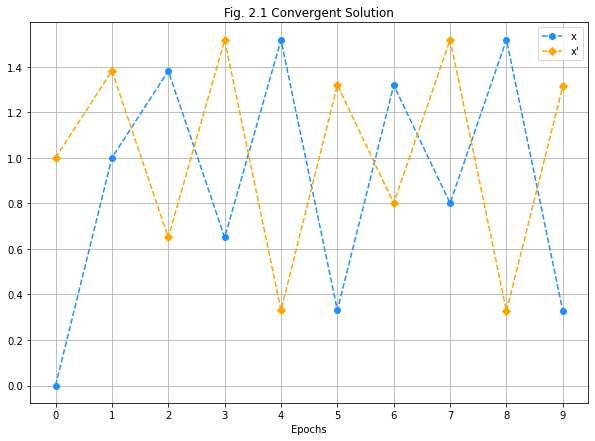

In [19]:
history_x = history_x[0:]
history_x_prime = history_x_prime[0:]
x_range = np.arange(len(history_x),dtype=int)

plt.figure(figsize=(10,7))
plt.plot(x_range, history_x, 'o--',color='dodgerblue', label='x')
plt.plot(x_range, history_x_prime,'D--', color='orange', label='x\'')

plt.title("Fig. 2.1 Convergent Solution")
plt.xlabel("Epochs")
plt.xticks(np.arange(min(x_range), max(x_range)+1, 1.0))
plt.legend()
plt.grid()
plt.show()

In [15]:
def l(x): return np.sin(x)+np.cos(x**2)

In [16]:
x = 0
epochs = 10
history_x = []
history_x_prime = []
for epoch in range(epochs):
  x_prime = l(x)
  history_x.append(x)
  history_x_prime.append(x_prime)
  if np.allclose(x, x_prime, 1.0e-6):
    break
  x = x_prime

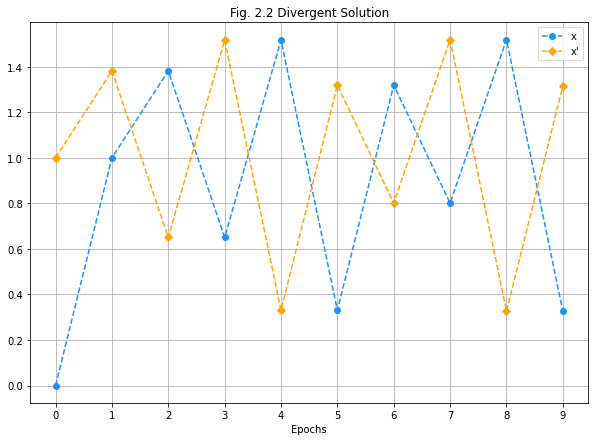

In [18]:
history_x = history_x[0:]
history_x_prime = history_x_prime[0:]
x_range = np.arange(len(history_x),dtype=int)

plt.figure(figsize=(10,7))
plt.plot(x_range, history_x, 'o--',color='dodgerblue', label='x')
plt.plot(x_range, history_x_prime,'D--', color='orange', label='x\'')

plt.title("Fig. 2.2 Divergent Solution")
plt.xlabel("Epochs")
plt.xticks(np.arange(min(x_range), max(x_range)+1, 1.0))
plt.legend()
plt.grid()
plt.show()

## 2.4 Newton-Raphson Method
The Newton-Raphson Method is another iterative computational method in solving for the roots of equations. Unlike the brute-force method, the Newton-Raphson method uses the updated function: 
$$x'=x- \frac{f(x)}{f'(x)}\\ _{\text{(Eq. 2.1.5)}}$$
Whereas $x'$ is the guessed root, $f(x)$ is the equation we are solving, and $f'(x)$ is the derivative of that function. This method is more commonly used compared to the brute-force method since it converges faster.

Let's try to use this sample equation for our implementation of the Newton-Raphson method:
$$f(x)=2x^2-5x+3=0$$
Whereas its derivative is $f'(x) = 4x-5$.

In [ ]:
def f(x): return 2*x**2 - 5*x + 3
def f_prime(x): return 4*x-5

In [ ]:
## Single Root
epochs = 100
x = 0
for epoch in range(epochs):
  x_new = x - (f(x)/f_prime(x))
  if np.allclose(x, x_new, 1.0e-06):
    break
  x = x_new
print("The root is {:.2f}".format(x))
print(epoch)

The root is 1.00
6


In [ ]:
## N roots
epochs = 100
n_roots = 2
roots = []
inits = np.arange(0,5)
for init in inits:
  x=init
  for epoch in range(epochs):
    x_new = x - (f(x)/f_prime(x))
    if np.allclose(x, x_new, 1.0e-05):
      roots.append(x)
      break
    x = x_new
print("The roots are {}".format(np.unique(np.around(roots,3))))
print(epoch)

The roots are [1.  1.5]
6


$$g(x)=x^2+cos^2(x)-4x \\ g'(x)=2x-2cos(x)sin(x)-4$$

In [ ]:
def g(x): return x**2+np.cos(x)**2-(4*x)
def g_prime(x): return 2*(x-np.cos(x)*np.sin(x)-2)

In [ ]:
## Solving for N number of roots
epochs = 100
n_roots = 2
roots = []
inits = np.arange(0,5)
for init in inits:
  x=init
  for epoch in range(epochs):
    x_new = x - (g(x)/g_prime(x))
    if np.allclose(x, x_new, 1.0e-05):
      roots.append(x)
      break
    x = x_new
print("The roots are {}".format(np.unique(np.around(roots,3))))
print(epoch)

The roots are [0.25 3.85]
2


## References
[1] J.R. Hauser. (2009) *Roots of Nonlinear Equations.* Engineering Models. Springer, Dordrecht. https://doi.org/10.1007/978-1-4020-9920-5_3